# Integrating with GeoPandas

As of version 0.4.0, VerticaPy features GeoPandas integration. This allows you to easily export a vDataFrame as a GeoPandas DataFrame, giving you more control over geospatial data.

This example demonstrates the advantages of GeoPandas integration with the 'world' dataset.

pop_est                  continent                   country   \\
1           140    Seven seas (open ocean)    Fr. S. Antarctic Lands   \\
2          2931              South America              Falkland Is.   \\
3          4050                 Antarctica                Antarctica   \\
4         57713              North America                 Greenland   \\
5        265100                       Asia                 N. Cyprus   \\
6        279070                    Oceania             New Caledonia   \\
7        282814                    Oceania                   Vanuatu   \\
8        329988              North America                   Bahamas   \\
9        339747                     Europe                   Iceland   \\
10       360346              North America                    Belize   \\
11       443593                       Asia                    Brunei   \\
12       591919              South America                  Suriname   \\
13       594130                     Europe                Luxembourg   \\
14       603253                     Africa                 W. Sahara   \\
15       642550                     Europe                Montenegro   \\
16       647581                    Oceania               Solomon Is.   \\
17       737718              South America                    Guyana   \\
18       758288                       Asia                    Bhutan   \\
19       778358                     Africa                Eq. Guinea   \\
20       865267                     Africa                  Djibouti   \\
21       920938                    Oceania                      Fiji   \\
22      1218208              North America       Trinidad and Tobago   \\
23      1221549                       Asia                    Cyprus   \\
24      1251581                     Europe                   Estonia   \\
25      1291358                       Asia               Timor-Leste   \\
26      1467152                     Africa                  eSwatini   \\
27      1772255                     Africa                     Gabon   \\
28      1792338                     Africa             Guinea-Bissau   \\
29      1895250                     Europe                    Kosovo   \\
30      1944643                     Europe                    Latvia   \\
31      1958042                     Africa                   Lesotho   \\
32      1972126                     Europe                  Slovenia   \\
33      2051363                     Africa                    Gambia   \\
34      2103721                     Europe                 Macedonia   \\
35      2214858                     Africa                  Botswana   \\
36      2314307                       Asia                     Qatar   \\
37      2484780                     Africa                   Namibia   \\
38      2823859                     Europe                 Lithuania   \\
39      2875422                       Asia                    Kuwait   \\
40      2990561              North America                   Jamaica   \\
41      3045191                       Asia                   Armenia   \\
42      3047987                     Europe                   Albania   \\
43      3068243                       Asia                  Mongolia   \\
44      3351827              North America               Puerto Rico   \\
45      3360148              South America                   Uruguay   \\
46      3424386                       Asia                      Oman   \\
47      3474121                     Europe                   Moldova   \\
48      3500000                     Africa                Somaliland   \\
49      3753142              North America                    Panama   \\
50      3758571                     Africa                Mauritania   \\
51      3856181                     Europe          Bosnia and Herz.   \\
52      4292095                     Europe                   Croatia   \\
53      4510327                    Oceania               New Zealand   \\
54      4543
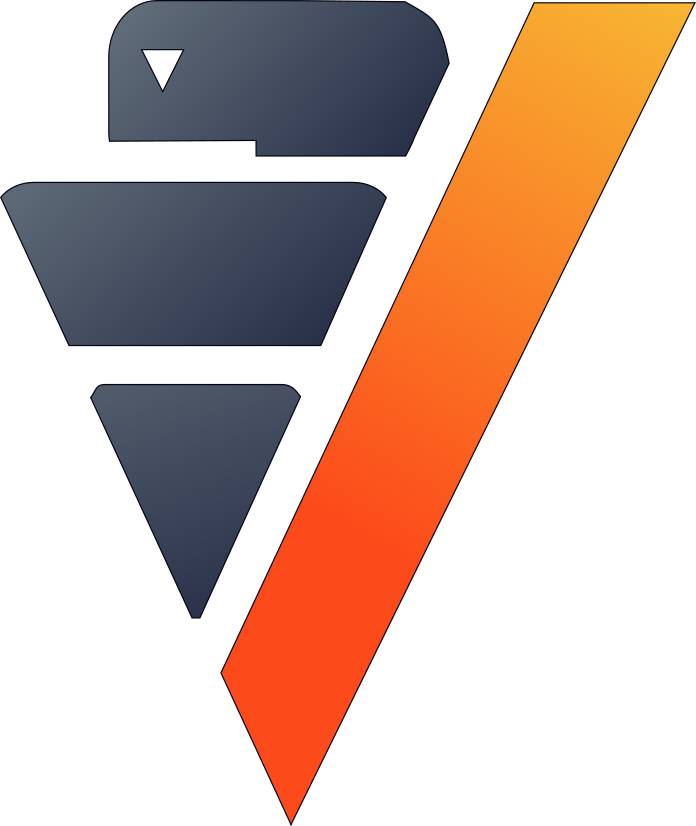

In [1]:
from verticapy.datasets import load_world
world = load_world()
display(world)

The 'apply' function of the VerticaPy stats module allows you to apply any Vertica function to the data. Let's compute the area of each country.

pop_est                  continent                   country   \\
1           140    Seven seas (open ocean)    Fr. S. Antarctic Lands   \\
2          2931              South America              Falkland Is.   \\
3          4050                 Antarctica                Antarctica   \\
4         57713              North America                 Greenland   \\
5        265100                       Asia                 N. Cyprus   \\
6        279070                    Oceania             New Caledonia   \\
7        282814                    Oceania                   Vanuatu   \\
8        329988              North America                   Bahamas   \\
9        339747                     Europe                   Iceland   \\
10       360346              North America                    Belize   \\
11       443593                       Asia                    Brunei   \\
12       591919              South America                  Suriname   \\
13       594130                     Europe                Luxembourg   \\
14       603253                     Africa                 W. Sahara   \\
15       642550                     Europe                Montenegro   \\
16       647581                    Oceania               Solomon Is.   \\
17       737718              South America                    Guyana   \\
18       758288                       Asia                    Bhutan   \\
19       778358                     Africa                Eq. Guinea   \\
20       865267                     Africa                  Djibouti   \\
21       920938                    Oceania                      Fiji   \\
22      1218208              North America       Trinidad and Tobago   \\
23      1221549                       Asia                    Cyprus   \\
24      1251581                     Europe                   Estonia   \\
25      1291358                       Asia               Timor-Leste   \\
26      1467152                     Africa                  eSwatini   \\
27      1772255                     Africa                     Gabon   \\
28      1792338                     Africa             Guinea-Bissau   \\
29      1895250                     Europe                    Kosovo   \\
30      1944643                     Europe                    Latvia   \\
31      1958042                     Africa                   Lesotho   \\
32      1972126                     Europe                  Slovenia   \\
33      2051363                     Africa                    Gambia   \\
34      2103721                     Europe                 Macedonia   \\
35      2214858                     Africa                  Botswana   \\
36      2314307                       Asia                     Qatar   \\
37      2484780                     Africa                   Namibia   \\
38      2823859                     Europe                 Lithuania   \\
39      2875422                       Asia                    Kuwait   \\
40      2990561              North America                   Jamaica   \\
41      3045191                       Asia                   Armenia   \\
42      3047987                     Europe                   Albania   \\
43      3068243                       Asia                  Mongolia   \\
44      3351827              North America               Puerto Rico   \\
45      3360148              South America                   Uruguay   \\
46      3424386                       Asia                      Oman   \\
47      3474121                     Europe                   Moldova   \\
48      3500000                     Africa                Somaliland   \\
49      3753142              North America                    Panama   \\
50      3758571                     Africa                Mauritania   \\
51      3856181                     Europe          Bosnia and Herz.   \\
52      4292095                     Europe                   Croatia   \\
53      4510327                    Oceania               New Zealand   \\
54      4543
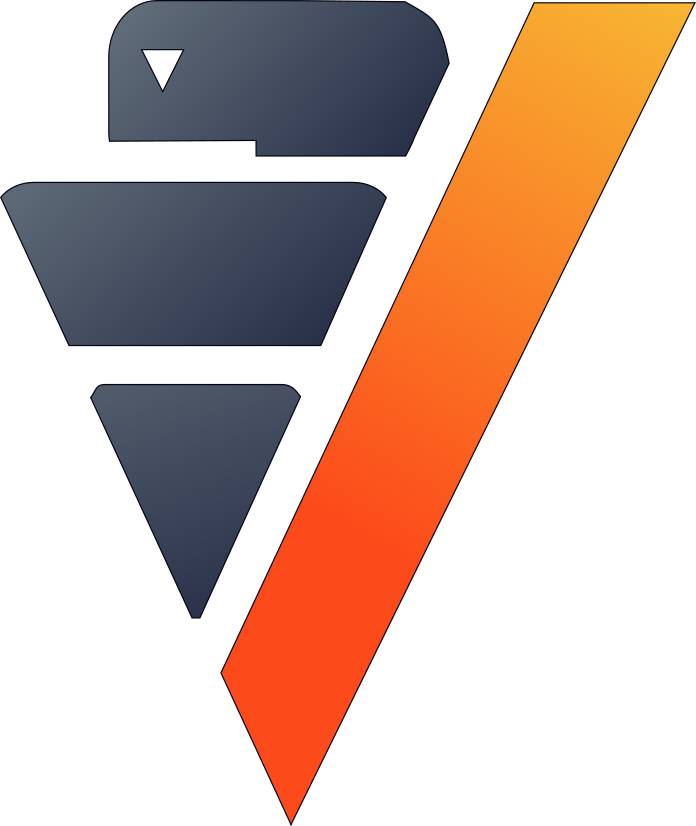

In [2]:
import verticapy.stats as st
world["geography"] = st.apply("stv_geography", world["geometry"])
world["geography"].astype("geography")
world["area"] = st.apply("st_area", world["geography"])
display(world)

We can now export our vDataFrame as a GeoPandas DataFrame.

In [3]:
df = world.to_geopandas(geometry = "geometry")
display(df)

,pop_est,continent,country,geography,area,geometry
0,140,Seven seas (open ocean),Fr. S. Antarctic Lands,b'\\251UY\\305\\300\\000\\000\\000\\000\\000\\...,1.156510e+10,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
1,2931,South America,Falkland Is.,b'\\203\\377\\363\\304\\000\\000\\000\\000\\00...,1.630198e+10,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
2,4050,Antarctica,Antarctica,b'\\200\\000\\000\\000\\000\\000\\000\\000\\00...,1.223625e+13,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
3,57713,North America,Greenland,b'\\226\\252\\240\\000\\000\\000\\000\\000\\00...,2.189751e+12,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
4,265100,Asia,N. Cyprus,b'\\274\\000\\014\\000\\000\\000\\000\\000\\00...,3.786381e+09,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
...,...,...,...,...,...,...
172,207353391,South America,Brazil,b'\\200\\000\\000\\000\\000\\000\\000\\000\\00...,8.540950e+12,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
173,260580739,Asia,Indonesia,b'\\200\\000\\000\\000\\000\\000\\000\\000\\00...,1.827304e+12,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
174,326625791,North America,United States of America,b'\\226\\252\\240\\000\\000\\000\\000\\000\\00...,9.494301e+12,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
175,1281935911,Asia,India,b'\\274\\000\\000\\000\\000\\000\\000\\000\\00...,3.150427e+12,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


From there, we can draw any geospatial object.

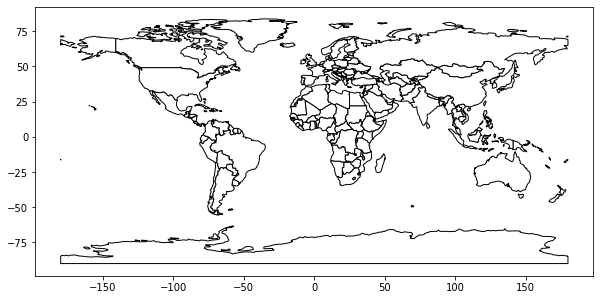

In [4]:
ax = df.plot(edgecolor = "black",
             color = "white",
             figsize = (10, 9))

<AxesSubplot:xlabel='"lon"', ylabel='"lat"'>

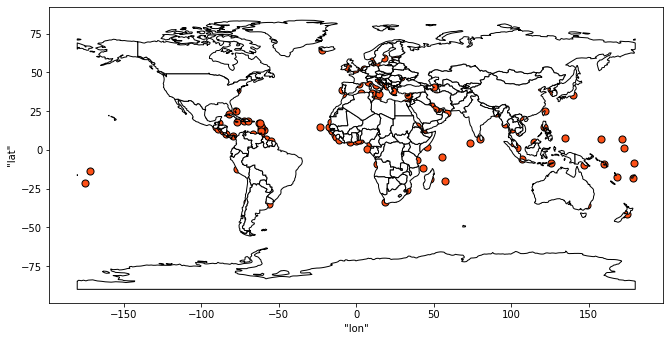

In [5]:
from verticapy.datasets import load_cities
# Loading the cities dataset
cities = load_cities()

import verticapy.stats as st
import matplotlib.pyplot as plt

# Creating a Matplotlib figure
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Extracting longitude and latitude
cities["lon"] = st.apply("st_x", cities["geometry"])
cities["lat"] = st.apply("st_y", cities["geometry"])

# Drawing the data on a Map
ax = cities.scatter(["lon", "lat"], ax = ax)
df.plot(edgecolor = "black",
        color = "white",
        ax = ax)

You can also draw maps using the 'geo_plot' method. The dataset used in the following cell is available <a href="../../../data/africa_education.csv">here</a>.

<AxesSubplot:xlabel='"lon"', ylabel='"lat"'>

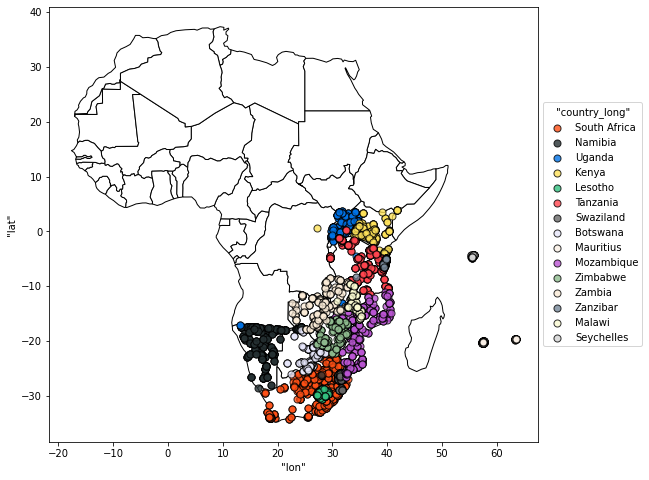

In [6]:
import verticapy as vp

# Africa Dataset
africa = vp.read_csv("data/africa_education.csv")
africa_world = load_world()
africa_world = africa_world[africa_world["continent"] == "Africa"]
ax = africa_world["geometry"].geo_plot(color = "white",
                                       edgecolor='black',)

# displaying schools in Africa
africa.scatter(["lon", "lat"],
               catcol = "country_long",
               ax = ax,
               with_others = False,
               max_cardinality = 20)